In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz

In [2]:
X_level = pd.Series([1,2,3,4,5,6,7,8,9,10])
y_salary = pd.Series([45,50,60,80,11,150,200,300,500,1000])

In [7]:
#X_level = X_level.values.reshape(-1, 1)
rfrmodel = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfrmodel.fit(X_level, y_salary)

RandomForestRegressor(random_state=0)

In [12]:
y_pred1 = rfrmodel.predict(np.array([6]).reshape(-1,1))
print(y_pred1)

[119.83]


In [14]:
X_grid = np.arange(min(X_level), max(X_level), 0.01)
print(X_grid)

[1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12 1.13
 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26 1.27
 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4  1.41
 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53 1.54 1.55
 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68 1.69
 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82 1.83
 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95 1.96 1.97
 1.98 1.99 2.   2.01 2.02 2.03 2.04 2.05 2.06 2.07 2.08 2.09 2.1  2.11
 2.12 2.13 2.14 2.15 2.16 2.17 2.18 2.19 2.2  2.21 2.22 2.23 2.24 2.25
 2.26 2.27 2.28 2.29 2.3  2.31 2.32 2.33 2.34 2.35 2.36 2.37 2.38 2.39
 2.4  2.41 2.42 2.43 2.44 2.45 2.46 2.47 2.48 2.49 2.5  2.51 2.52 2.53
 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61 2.62 2.63 2.64 2.65 2.66 2.67
 2.68 2.69 2.7  2.71 2.72 2.73 2.74 2.75 2.76 2.77 2.78 2.79 2.8  2.81
 2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89 2.9  2.91 2.92 2.93 2.94 2.95
 2.96 

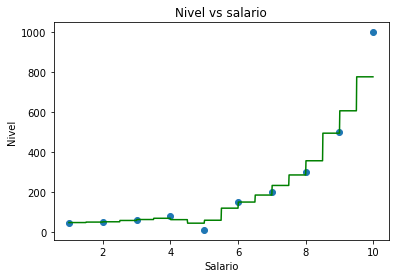

In [16]:
X_grid = X_grid.reshape((len(X_grid),1))
plt.plot(X_grid, rfrmodel.predict(X_grid), color='green')
plt.title('Nivel vs salario')
plt.xlabel('Salario')
plt.ylabel('Nivel')
plt.scatter(X_level, y_salary)
plt.show()

In [17]:
import sklearn.datasets
dsBoston = sklearn.datasets.load_boston()
dsBoston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [19]:
X_features = dsBoston.data
y_prices = dsBoston.target
X_train, X_test, y_train, y_test = train_test_split(X_features, y_prices, test_size = 0.2, random_state=42)

In [20]:
rfrmBoston = RandomForestRegressor(n_estimators=100, random_state=0)
rfrmBoston.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [23]:
y_expected = y_test
y_predicted = rfrmBoston.predict(X_test)
print('Model performance is ')
print('----------------')
print('R2 : {}'.format(metrics.r2_score(y_expected, y_predicted)))

Model performance is 
----------------
R2 : 0.873390709910713


In [25]:
y_predicted = rfrmBoston.predict(X_features)
dfAP = pd.DataFrame({'Actual': y_prices, 'Prediccion': y_predicted})
dfAP

,Actual,Prediccion
0,24.0,27.970
1,21.6,21.811
2,34.7,35.150
3,33.4,34.612
4,36.2,35.173
...,...,...
501,22.4,23.564
502,20.6,19.918
503,23.9,25.040
504,22.0,23.948


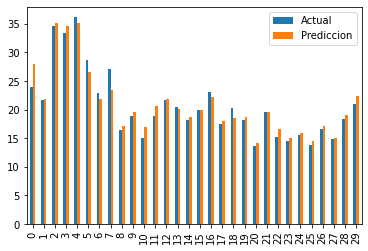

In [26]:
dfAP.head(30).plot(kind='bar')
plt.show()